In [1]:
#this is another notebook for the broadening function, but the difference is now that i've learned from Ben that i don't need to take the .fits
#files and remove the edge effects. he has already done this, the .ls files exist. I just need to try to take those .ls files first from stars
#with "good" broadening functions and replicate it, make sure my code is good. Once that's done, i need to do it for the stars that have "bad"
#or no broadening functions. easy enough, right?

In [1]:
import numpy as np
import os
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.ndimage import gaussian_filter
import astropy
import saphires as saph
import matplotlib
matplotlib.use('MacOSX') #solves backend issue with PyQt5; PyQt5 doesn't work
import os
import glob

In [2]:
R_coude = 60000.0 #spectral resolution of the Coude.
c = (2.9979245*10**5) #speed of light in km/s

star = 'V846Her' #input the name of the star you want to do BF calculations for
folder_path = '/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/' + star  # Change this to the path of your folder

file_pattern = os.path.join(folder_path, '*.ls')  #Goes into your path and finds all .ls files in the folder
ls_files = glob.glob(file_pattern)
txtfiles = [os.path.basename(file) for file in ls_files]  #Takes the names of the .ls files and puts into a txtfile array
print(len(txtfiles))
for i in range(len(txtfiles) - 1, -1, -1):     #Ensure only files with the right first letter are in the array
    txtfiles[i] = str(txtfiles[i])
    if txtfiles[i].lower()[0] != star.lower()[0]:
        del txtfiles[i]

for i in range(len(txtfiles)): #prints the values of the array to double check all the .ls files are there
    print(txtfiles[i])
print(len(txtfiles))

2
V846Her_2020-08-06_0.ls
V846Her_2020-05-10_0.ls
2


In [5]:
from glob import glob

template = '/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/templates/logg4.5/lte05100-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes_2800-11000_air.p'
#very important to use the correct sample. the template is chosen by the Teff of the SSG and the log(g) in Ben's sample, 
#the Teff and log(g) are given in a .p file. if they are not given, refer to literature for the values
path= '/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/'+star+'/' #input path to where .ls files are 
file_select = star+'*.ls' #finds all the .ls files
files = path+file_select #puts the path and the files all together a path directly to the files
filenames = []
for f in glob(files): #gives all the paths for files ending with .ls
    for i in range(9): #change the number of .ls files
        filenames.append(f)
        break
for l in range(len(filenames)):
    print(filenames[l])

/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2020-08-06_0.ls
/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2020-05-10_0.ls
/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2021-03-31_0.ls
/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2020-09-03_0.ls
/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2021-05-04_0.ls


In [7]:
new_dir = 'Edin_p_files' #create a new directory to distinguish 
save_path = os.path.join(path, new_dir)
os.mkdir(save_path)
print("Directory '%s' created" %directory)

/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2020-08-06_0.ls
/Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her/V846Her_2020-05-10_0.ls


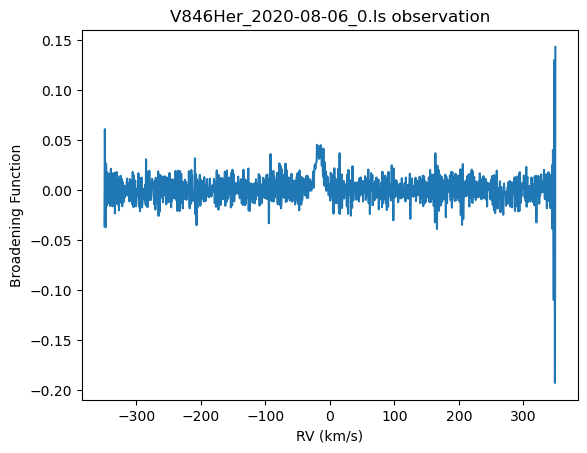

Saved as:  /Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her//Edin_p_files/Edin_V846Her_2020-08-06_0.ls_5100_4.5.p


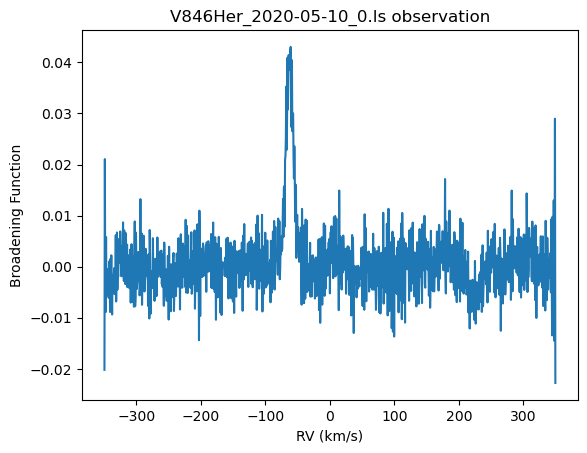

Saved as:  /Users/edinpeskovic/Documents/research_summer_2024/Spectroscopy_Lab/Edin_BF/SSGs/stars/V846Her//Edin_p_files/Edin_V846Her_2020-05-10_0.ls_5100_4.5.p


In [10]:
for i in range (len(filenames)):
    
    tar, tar_spec = saph.io.read_pkl(filenames[i], combine_all = False)
    temp = saph.io.read_pkl(template, temp = True)

    tar_spec = saph.utils.prepare(tar,tar_spec,temp)
    tar_spec = saph.bf.compute(tar,tar_spec,vel_width=700)
    tar_spec = saph.bf.analysis(tar,tar_spec,R=60000,sb='sb1',single_plot=True)

    import matplotlib.pyplot as plt
    matplotlib.use('MacOSX')
    %matplotlib inline

    plt.plot(tar_spec[tar[0]]['vel'], tar_spec[tar[0]]['bf']) #plots the RV vs BF 
    plt.title(txtfiles[i] + ' observation')
    plt.xlabel('RV (km/s)')
    plt.ylabel('Broadening Function')
    plt.show()

    #to save as .pkl
    saph.io.save(tar, tar_spec, path + '/Edin_p_files/Edin_' + txtfiles[i] + '_5100_4.5') #change the last string depending on Teff and log(g) of template